# Load data

                        sub  PR Evidence  bias_lowbaserate  bias_finalstate  \
0  61460488fc1bdf4d2c8ce1db        0.375              0.50              0.0   
1  5e57a0020c3c6a14a1624031        0.750              0.50              0.5   
2  5b222aff59f9620001c109cb        0.375              0.50              0.5   
3  60ca1c436511b9fc8ab35615        0.250              0.25              0.5   
4  5e0fac24500f066c547f6376        0.750              0.50              0.5   

   pre_map_change  post_map_change  
0            1.00              1.0  
1            0.50              1.0  
2            1.00              1.0  
3            1.00              1.0  
4            0.75              0.0  
[0.375 0.75  0.25  0.625 0.5   1.    0.125]


/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_21707/3026826174.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x=sns.countplot(x="PR Evidence", palette='Blues',data=df,ax=axes[0],order = [x/8 for x in range(0,9)])
/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_21707/3026826174.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])


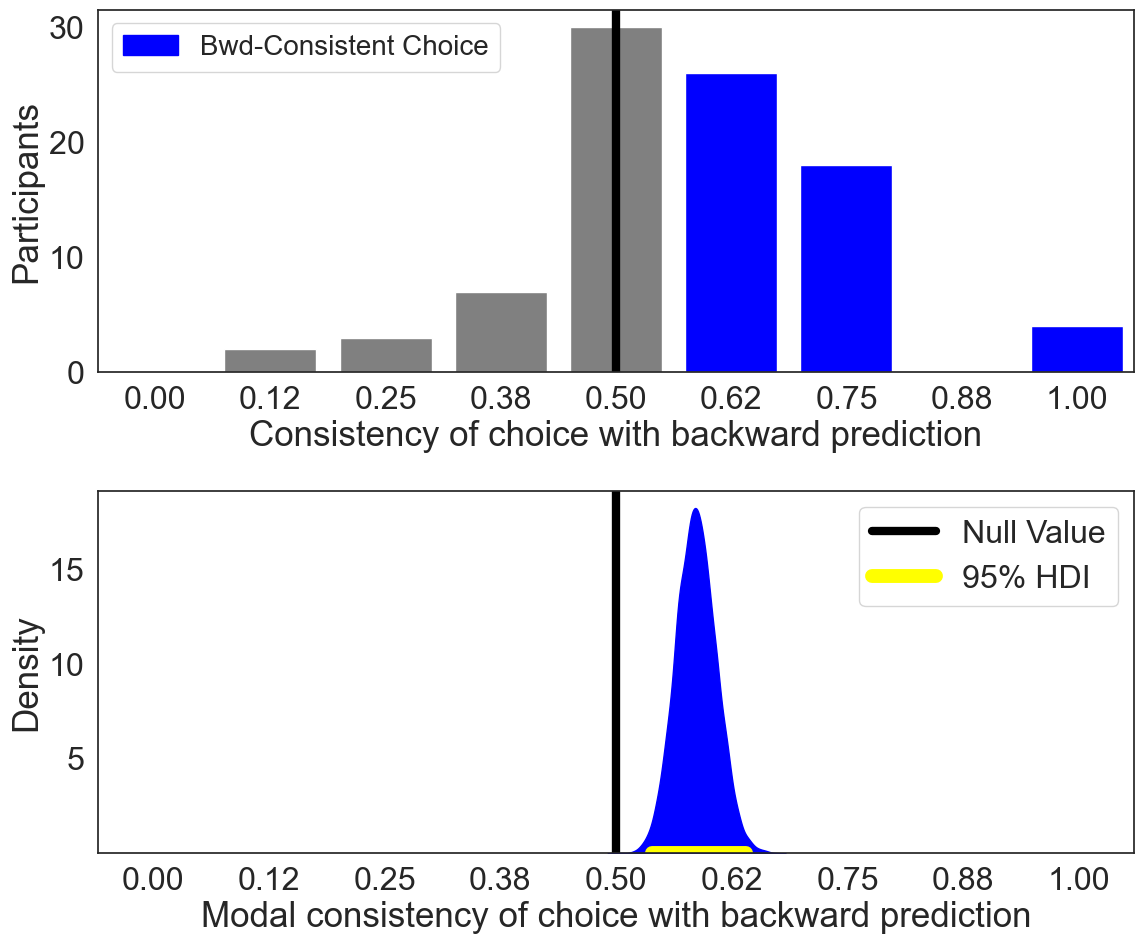

/var/folders/cf/c6ff6lpn3tnbdthkrc54w_jsjshssr/T/ipykernel_21707/3026826174.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])


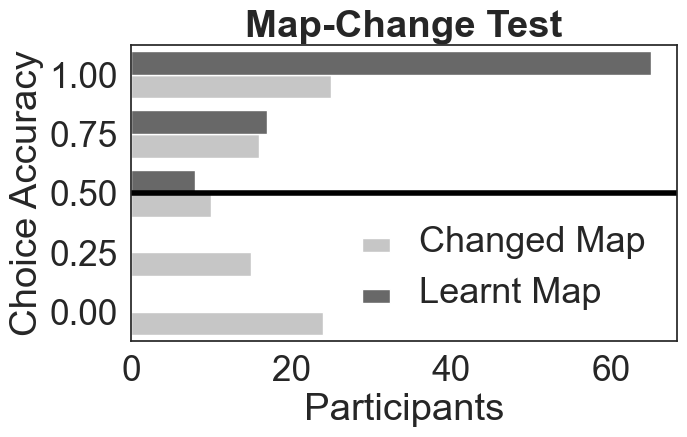

ROPE of PR EVIDENCE: 0.016776906017814692


In [12]:
# load dependencies
import numpy as np
from IPython.display import Image
from matplotlib import gridspec
from scipy.stats import pearsonr as corrp
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


df=pd.read_csv('all_planning_questions_baseratebias.csv') #load data
print(df.head())
#print means of each key variable

#Convert percentage of each key variable to number of successes out of 8 choices
#The purpose of this is to transform the data such that it can be modelled by a binomial likelihood



distal_bias=df['bias_finalstate']*8

action_bias=np.abs(1-df['bias_lowbaserate'])*8
df['action_bias']=action_bias
n_subjects=len(df)
PR_evidence=df['PR Evidence']*8

rr_map=df['pre_map_change']*4
tr_changed_map=df['post_map_change']*4
sns.set(style='white', font='arial', font_scale=2.1, rc={'figure.figsize':(12,10)})


fig, axes = plt.subplots(2, 1)

x=sns.countplot(x="PR Evidence", palette='Blues',data=df,ax=axes[0],order = [x/8 for x in range(0,9)])

y=sns.kdeplot(data=df_posterior, x=('posterior', 'omega'),ax=axes[1],fill=True,alpha=1,color='blue')
axes[0].set_ylabel('Participants')
print(df["PR Evidence"].unique())
axes[0].bar(df["PR Evidence"].unique()*8, df["PR Evidence"].value_counts(sort=False), color=['gray', 'blue', 'gray', 'blue', 'gray','blue', 'gray'])
axes[0].set_xlabel('Consistency of choice with backward prediction')
axes[0].set_xlim(-0.5, 8.5)
# axes[0].xaxis.set_major_formatter('{x:.1f}')
# axes[0].set_title('Backward Prediction Choices',fontweight='bold')

axes[0].axvline(4,color='black',linewidth=6.0)
# axes[1].set_title('Backward Prediction Posterior Evidence',fontweight='bold')

axes[1].set_xlim(-0.06,1.06)
axes[1].set_ylim
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Modal consistency of choice with backward prediction')
axes[1].axvline(0.5,color='black',linewidth=6.0)
axes[1].axhline(y=0,xmin=0.535,xmax=0.625,color='yellow',linewidth=10.0)
plt.sca(axes[1])
plt.yticks([5,10,15])
plt.xticks([0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.00])
axes[0].margins(x=0)
axes[1].margins(x=0)
axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])

axes[1].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[1].get_xticklabels()])
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', lw=6, label='Null Value'),
    Line2D([0], [0], color='yellow', lw=10, label='95% HDI')
]
axes[1].legend(handles=legend_elements, loc='upper right')
from matplotlib.patches import Patch

# Define legend elements using a square (patch) instead of a line
legend_elements = [
    Patch(facecolor='blue', edgecolor='blue', label='Bwd-Consistent Choice')
]

# Add the legend to the plot
axes[0].legend(handles=legend_elements, loc='upper left',fontsize=20)
fig.subplots_adjust(hspace=0.7)
plt.tight_layout()

plt.savefig('study1_PRevidence.pdf',dpi=300)

plt.show()

sns.set(style='white', font='arial', font_scale=2.3, rc={'figure.figsize':(7.5,5)})
fig, ax = plt.subplots()
#sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))


#load data
df_new=pd.DataFrame()
df_new['Revaluation Score']=df['pre_map_change'].values.tolist()+df['post_map_change'].values.tolist()
df_new['']=['Learnt Map']*len(df)+['Changed Map']*len(df)                              
#plot transition revaluation performance

ax=sns.countplot(data=df_new, y="Revaluation Score",hue="",palette='Greys',orient='v')
plt.xlabel('Participants')

ax.set_ylim(-0.5,4.5)
ax.set_yticklabels(['{:.2f}'.format(float(t.get_text())) for t in ax.get_yticklabels()])

plt.axhline(2,color='black',linewidth=4.0)
sns.move_legend(ax, "lower right",frameon=False)

# Change the font size of the legend text
leg = ax.get_legend()
for text in leg.get_texts():
    text.set_fontsize(26)

# Change the size and spacing of the legend bars
for patch in leg.get_patches():
    patch.set_height(10)
    patch.set_width(20)
    patch.set_x(patch.get_x() + 30) # adjust the y position of the bars


# for tick in ax.get_xaxis().get_major_ticks():
#     tick.set_pad(8.)

plt.ylabel('Choice Accuracy')
plt.title('Map-Change Test',fontweight='bold')

plt.tight_layout()

plt.savefig('study1_tr_Reval.pdf',dpi=300)
plt.show()

# Print 0.1*SD of PR Evidence to define the ROPE
print('ROPE of PR EVIDENCE: {}'.format(0.1*df['PR Evidence'].std()))


# Fit Model for Hypothesis 1: Evidence for PR-based Planning

Below we fit the beta-binomial described in text to choice data for Variable 1, which defines the number of times participants chose in line with PR-based planning. If omega, the mode of the group distribution, is estimated to be significantly greater than 0.5 (no evidence of PR-based planning), then we conclude evidence for our main hypothesis.

We followed Kruschke’s (2014) guidelines to derive the ROPE, wherein we took the standard deviation of the percentage of times subjects chose in line with PR-based planning and multiplied this value by 0.1 , which was 0.18, and multiplied this by 0.1, to define effects that are too small to be considered significant. We then rounded this up to 0.2 to make it even a bit more conservative than Kruschke’s (2014) recommendation. We use this ROPE for all subsequent analyses.

Note below, we fit the same model to the two subsequent manipulation checks, except include different variables (specifically, variables 3 and 5 as described in the preregistration).

In [3]:
subjects= [*range(n_subjects)]
print(subjects)
with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249, transform=None)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)

    y = pm.Binomial('y',n=8,p=theta[subjects], observed=PR_evidence) 
    
with hierarchical_model:
    trace_main = pm.sample(draws=2000, target_accept=0.99)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.


In [5]:
import arviz as az
az.summary(trace_main, var_names="omega",hdi_prob=0.95)


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.587,0.022,0.545,0.63,0.001,0.0,1791.0,3422.0,1.0


## Posterior distribution for group-level tendency to choose in line with PR-based planning

As you see below, the parameter omega defining the group-level tendency to choose in line with PR-based planning was significantly greater than the null value of 0.5. Specifically, the posterior highest density interval does not contain any values in the pre-defined region of practical equivalence, defining values similar-enough to 0.5 to be considered null effect sizes. 

In [6]:
df_posterior=trace_main.to_dataframe()
print(df_posterior[('posterior', 'omega')])
print(df_posterior.to_csv('posterior_model.csv'))

0       0.599095
1       0.567160
2       0.573401
3       0.581463
4       0.613763
          ...   
7995    0.604003
7996    0.569918
7997    0.561183
7998    0.576094
7999    0.591524
Name: (posterior, omega), Length: 8000, dtype: float64
None


# Fit model for manipulation check 1: Bias for distal reward?

In [7]:
with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249, transform=None)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)

    y = pm.Binomial('y',n=8,p=theta[subjects], observed=distal_bias) 
    
with hierarchical_model:
    trace_distal = pm.sample(draws=4000, target_accept=0.99,init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 16 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [8]:
df_posterior_distal=trace_distal.to_dataframe()


# Fit model for manipulation check 2: Bias high starting-state base-rate?

In [11]:
with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249, transform=None)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)

    y = pm.Binomial('y',n=8,p=theta[subjects], observed=action_bias) 
    
with hierarchical_model:
    trace_action = pm.sample(draws=4000, target_accept=0.99,init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 16 seconds.


In [13]:
df_posterior_action=trace_action.to_dataframe()

# Is performance above chance after map changes?

In [14]:
subjects= [*range(n_subjects)]

with pm.Model() as hierarchical_model:
    alpha = pm.Gamma('alpha', 1.105125 , 0.1051249)
    beta = pm.Gamma('beta', 1.105125 , 0.1051249)
    
    theta = pm.Beta('theta', alpha=alpha+1, beta=beta+1, shape=n_subjects)

    y = pm.Binomial('y',n=4,p=theta[subjects], observed=tr_changed_map) 
    
with hierarchical_model:
    trace_changed_map = pm.sample(draws=4000, target_accept=0.999,init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 21 seconds.


In [15]:
import arviz as az
mean_tr=trace_changed_map.posterior.alpha.values/(trace_changed_map.posterior.alpha.values+trace_changed_map.posterior.beta.values)
az.summary(mean_tr,hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.534,0.229,0.11,0.976,0.002,0.002,8946.0,7921.0,1.0


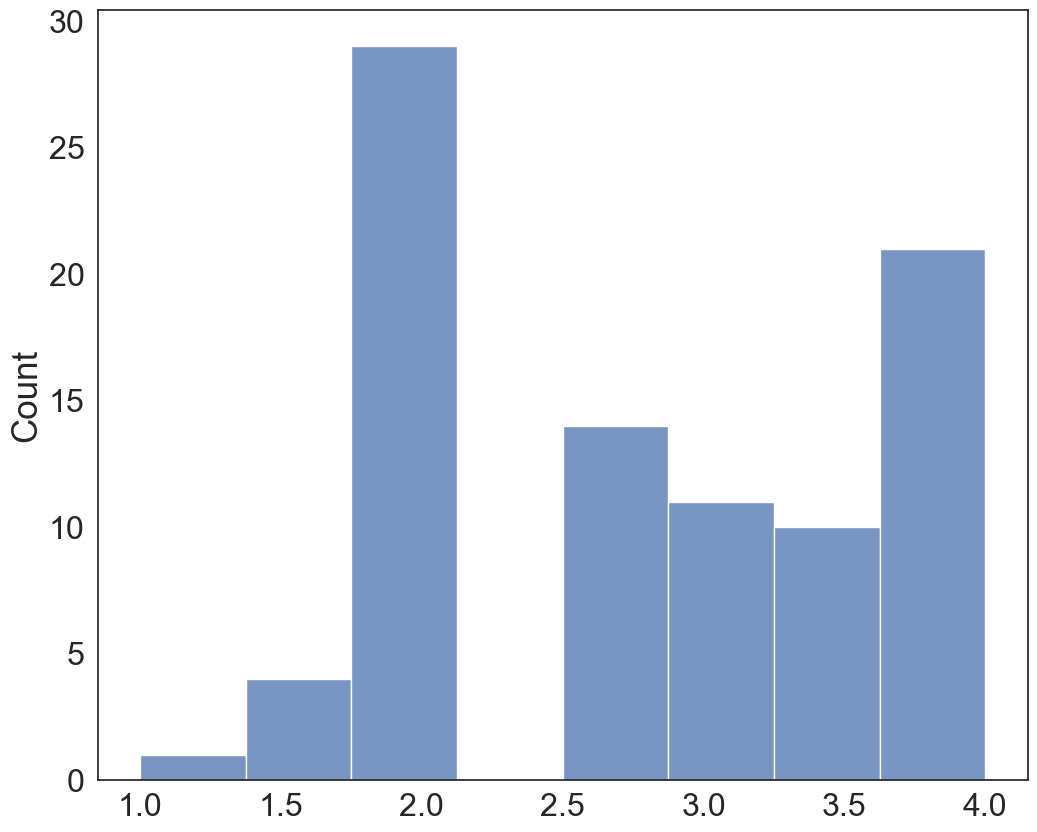

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [omega, kappa_minus2, theta]


Sampling 4 chains for 1_000 tune and 4_000 draw iterations (4_000 + 16_000 draws total) took 29 seconds.


In [12]:
difference_reval=(((rr_map-tr_changed_map))+4.0)/2.0
sns.histplot(difference_reval)
plt.show()
subjects= [*range(n_subjects)]

with pm.Model() as hierarchical_model:
    omega = pm.Beta('omega', 1., 1.)
    kappa_minus2 = pm.Gamma('kappa_minus2', 1.105125 , 0.1051249)
    kappa = pm.Deterministic('kappa', kappa_minus2 + 2)
    
    theta = pm.Beta('theta', alpha=omega*(kappa-2)+1, beta=(1-omega)*(kappa-2)+1, shape=n_subjects)
    y = pm.Binomial('y',n=4,p=theta[subjects], observed=difference_reval) 
    
with hierarchical_model:
    diff_reval = pm.sample(draws=4000, target_accept=0.999,init='adapt_diag')

In [4]:
import arviz as az
# diff_tr=diff_reval.posterior.alpha.values/(diff_reval.posterior.alpha.values+diff_reval.posterior.beta.values)
az.summary(diff_reval,['omega'],hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
omega,0.677,0.032,0.614,0.741,0.001,0.001,2012.0,3166.0,1.0


### To convert the scores above to % difference in correctness before and after the map change 

- ((0.5-x)*2)
- the 'x' here could be the mean
- this means participants did significantly worse (mean worse = -34%)

In [39]:
print(az.summary(trace_action,var_names=['omega'],hdi_prob=0.95))
print(az.summary(trace_distal,var_names=['omega'],hdi_prob=0.95))


        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.551  0.021     0.512      0.594        0.0      0.0    3147.0   

       ess_tail  r_hat  
omega    6675.0    1.0  
        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
omega  0.436  0.021     0.392      0.477        0.0      0.0    3756.0   

       ess_tail  r_hat  
omega    6596.0    1.0  


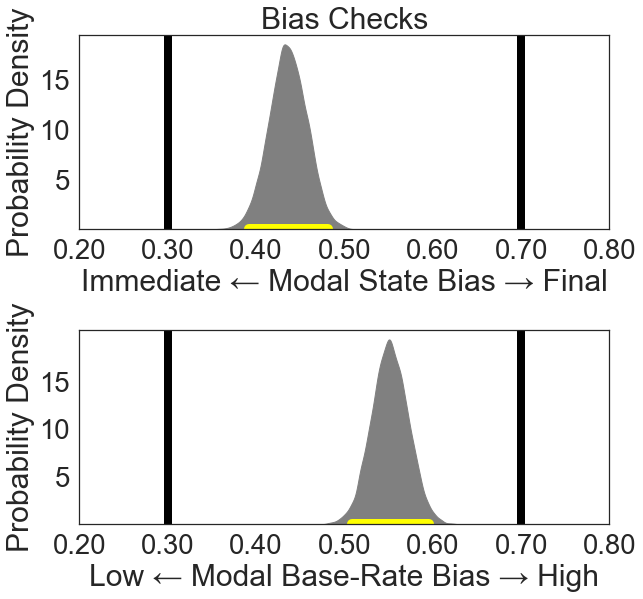

In [40]:
sns.set(style='white', font='arial', font_scale=2.5, rc={'figure.figsize':(9.5,9)})
fig, axes = plt.subplots(2, 1)

x=sns.kdeplot(data=df_posterior_distal, x=('posterior', 'omega'),ax=axes[0],fill=True,alpha=1,color="gray")

y=sns.kdeplot(data=df_posterior_action, x=('posterior', 'omega'),ax=axes[1],fill=True,alpha=1,color="gray")
axes[0].set_ylabel('Probability Density')
axes[0].set_xlabel('Immediate \u2190 Modal State Bias \u2192 Final')
axes[0].axvline(0.3,color='black',linewidth=8.0)
axes[0].axvline(0.7,color='black',linewidth=8.0)
axes[0].set_xlim(0.2,0.8)
axes[1].set_xlim(0.2,0.8)
axes[0].set_title('Bias Checks')
axes[0].axhline(y=0,xmin=0.32,xmax=0.47,color='yellow',linewidth=10.0)
axes[1].axhline(y=0,xmin=0.515,xmax=0.66,color='yellow',linewidth=10.0)

axes[1].set_ylabel('Probability Density')
axes[1].set_xlabel('Low \u2190 Modal Base-Rate Bias \u2192 High')
axes[1].axvline(0.3,color='black',linewidth=8.0)
axes[1].axvline(0.7,color='black',linewidth=8.0)
plt.sca(axes[0])
plt.yticks([5,10,15])

plt.xticks([0.2,0.30,0.4,0.50,0.6,0.70,0.8])
axes[0].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[0].get_xticklabels()])

plt.sca(axes[1])
plt.xticks([0.2,0.30,0.4,0.50,0.6,0.70,0.8])
axes[1].set_xticklabels(['{:.2f}'.format(float(t.get_text())) for t in axes[1].get_xticklabels()])

plt.yticks([5,10,15])

plt.sca(axes[1])


fig.subplots_adjust(hspace=0.52)

plt.savefig('study1_action_distal_bias.png',dpi=300)

plt.show()